# Exercise: Cherry Blossoms!

#### Summary

Once upon a time it was サクラ season, which meant the [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were in full bloom! This year they bloomed a little early and they've long sinced faded, so for today we'll stick with data-driven blossoms: http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/

#### Data Source(s)

Historical Series of Phenological data for Cherry Tree Flowering at Kyoto City
(and March Mean Temperature Reconstructions), http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/

#### Files

- KyotoFullFlower7.xls, "Full-flowering Dates of Prunus jamasakura in Kyoto City"

#### Skills

- Working with Excel files
- Ignoring the first few rows
- Replacing NaN values
- Counting and summarizing columns
- Replacing non-NaN values
- Extracting with strings
- Rolling means

# Read in `KyotoFullFlower7.xls`

Be sure to look at the first five rows.

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("KyotoFullFlower7.xls", skiprows= 25)

### That... doesn't look right. Why not? 

Examine your column names, and maybe even open up the file in Excel.

In [3]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


### Read in the file correctly, and look at the first five rows

- TIP: The first year should be 801 AD, and it should not have any dates or anything.

In [4]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


### Look at the final five rows of the data

In [5]:
df.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## Watching out for NaN values

Take a look at **Reference name**. Is there something you should set to be `NaN`? Use either of the two ways we have covered.

In [6]:
df['Reference Name'].value_counts()

-                                 388
NEWS-PAPER(ARASHIYAMA)             94
SUGIURAKE-NIKKI                    38
MYOHOIN-HINAMIKI                   32
OYUDONONO-UENO-NIKKI               26
DAIGOJI-ZATSUYO                    21
OYUDONONO-UENO-NIKKI [EDA]         21
NIHONKIRYAKU                       19
SANETAKA-KOKI                      19
(SHIRYO-SORAN)                     15
KAKUMEIKI                          15
ZOKU-SHIGUSHO                      14
NISUIKI                            13
INRYOGEN-NICHIROKU                 13
MEIGETSUKI                         12
GUKANKI                            10
GIENJUNKO-NIKKI(DAIGO)             10
MOTOHIRO-KOKI                       9
KEIHAN RAILWAY ADV(ARASHIYAMA)      9
DAIGO-ZOJIKI                        9
KANMON-GYOKI(FUSHIMI)               9
TERUYOSHI-KOKI                      8
RAI-SANYO-NIPPU                     8
MANZAIJUNGO-NIKKI(DAIGO)            8
ZOKU-HONCHOTSUKAN                   8
TAKAGI-ZAICHU-NIKKI                 8
TOKIYOSHI-KY

In [7]:
import numpy as np

In [8]:
np.nan

nan

In [9]:
df['Reference Name'].replace('-', np.nan, inplace=True)

In [10]:
df['Reference Name'].replace('NaN', np.nan, inplace=True)

In [11]:
df['Reference Name'].value_counts(dropna=True)

NEWS-PAPER(ARASHIYAMA)            94
SUGIURAKE-NIKKI                   38
MYOHOIN-HINAMIKI                  32
OYUDONONO-UENO-NIKKI              26
DAIGOJI-ZATSUYO                   21
OYUDONONO-UENO-NIKKI [EDA]        21
SANETAKA-KOKI                     19
NIHONKIRYAKU                      19
(SHIRYO-SORAN)                    15
KAKUMEIKI                         15
ZOKU-SHIGUSHO                     14
NISUIKI                           13
INRYOGEN-NICHIROKU                13
MEIGETSUKI                        12
GUKANKI                           10
GIENJUNKO-NIKKI(DAIGO)            10
KEIHAN RAILWAY ADV(ARASHIYAMA)     9
DAIGO-ZOJIKI                       9
MOTOHIRO-KOKI                      9
KANMON-GYOKI(FUSHIMI)              9
TOKITSUGU-KYOKI                    8
TERUYOSHI-KOKI                     8
ZOKU-HONCHOTSUKAN                  8
TAKAGI-ZAICHU-NIKKI                8
MANZAIJUNGO-NIKKI(DAIGO)           8
TOKIYOSHI-KYOKI                    8
HANAZONOTENNO-SHINKI               8
R

### Check that you have 827 values for "Full-flowering date (DOY)" and 825 for "Reference Name"

In [12]:
df['Full-flowering date (DOY)'].count()

827

In [13]:
df['Reference Name'].count()

825

# Cleaning up our data

## What sources are the most common as a reference?

In [14]:
df['Reference Name'].value_counts().head(5)

NEWS-PAPER(ARASHIYAMA)    94
SUGIURAKE-NIKKI           38
MYOHOIN-HINAMIKI          32
OYUDONONO-UENO-NIKKI      26
DAIGOJI-ZATSUYO           21
Name: Reference Name, dtype: int64

## Filter the list to only include rows that have a `Full-flowering date (DOY)`

In [15]:
df_ignore = df

In [16]:
df_ignore[df_ignore['Full-flowering date (DOY)'] != np.nan]['Reference Name'].value_counts()

NEWS-PAPER(ARASHIYAMA)            94
SUGIURAKE-NIKKI                   38
MYOHOIN-HINAMIKI                  32
OYUDONONO-UENO-NIKKI              26
DAIGOJI-ZATSUYO                   21
OYUDONONO-UENO-NIKKI [EDA]        21
SANETAKA-KOKI                     19
NIHONKIRYAKU                      19
(SHIRYO-SORAN)                    15
KAKUMEIKI                         15
ZOKU-SHIGUSHO                     14
NISUIKI                           13
INRYOGEN-NICHIROKU                13
MEIGETSUKI                        12
GUKANKI                           10
GIENJUNKO-NIKKI(DAIGO)            10
KEIHAN RAILWAY ADV(ARASHIYAMA)     9
DAIGO-ZOJIKI                       9
MOTOHIRO-KOKI                      9
KANMON-GYOKI(FUSHIMI)              9
TOKITSUGU-KYOKI                    8
TERUYOSHI-KOKI                     8
ZOKU-HONCHOTSUKAN                  8
TAKAGI-ZAICHU-NIKKI                8
MANZAIJUNGO-NIKKI(DAIGO)           8
TOKIYOSHI-KYOKI                    8
HANAZONOTENNO-SHINKI               8
R

## Make a histogram of the full-flowering date.

In [17]:
%matplotlib inline

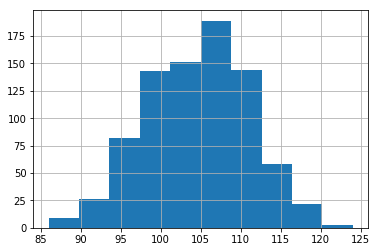

In [18]:
df_ignore['Full-flowering date (DOY)'].hist()

## Make another histogram of the full-flowering date, but with 39 bins instead of 10

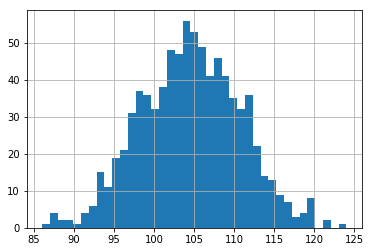

In [19]:
df_ignore['Full-flowering date (DOY)'].hist(bins=39)

## What's the average number of days it takes for the flowers to blossom? The max? Min? And how many records do we have?

Answer these with one line of code.

In [20]:
df_ignore['Full-flowering date (DOY)'].describe()

count    827.000000
mean     104.540508
std        6.407036
min       86.000000
25%      100.000000
50%      105.000000
75%      109.000000
max      124.000000
Name: Full-flowering date (DOY), dtype: float64

## What's the average number of days into the year cherry flowers normally blossomed before 1900?

In [21]:
pd.set_option("display.float_format", "{:.0f}".format)

In [22]:
df_ignore['Full-flowering date (DOY)'].value_counts(dropna=True).sort_values(ascending=False)

104    56
105    53
106    49
102    48
103    47
108    46
109    41
107    41
101    38
98     37
99     36
112    36
110    35
111    32
100    32
97     31
113    22
96     21
95     19
93     15
114    14
115    13
94     11
116     9
120     8
117     7
92      6
87      4
119     4
91      4
118     3
89      2
88      2
122     2
90      1
124     1
86      1
Name: Full-flowering date (DOY), dtype: int64

In [23]:
df_ignore[df_ignore['AD'] < 1900]['Full-flowering date (DOY)'].mean()

105.20728291316527

## How about after 1900?

In [24]:
df_ignore[df_ignore['AD'] > 1900]['Full-flowering date (DOY)'].mean()

100.3125

## How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [25]:
df_ignore[df_ignore['Data type code'] == 4].count()

AD                           39
Full-flowering date (DOY)    39
Full-flowering date          39
Source code                  39
Data type code               39
Reference Name               39
dtype: int64

In [26]:
#39 times

## Actually, that looks terrible. Replace the "Source code" and "data type code" columns with the values they stand for.

In [27]:
 
replacements = {

    
1: 'Reported by Taguchi (1939), J. Marine Meteorol. Soc. (Umi to Sora), 19, 217-227',
2: 'Added by Sekiguchi (1969), Tokyo Geography Papers, 13, 175-190.',
3: 'Added by Aono and Omoto (1994), J. Agric. Meteorol., 49, 263-272.',
4: 'Added by Aono and Kazui (2008), Int. J. Climatol., 28, 905-914 (doi: 10.1002/joc.1594).',
5: 'Cherry phenological data, Added by Aono and Saito (2010), Int. J. Biometeorol., 54, 211-219.',
6: 'Added by Aono (2011), Time Studies, 4, 17-29. (in Japanese with English abstract)',
7: 'Added by Aono (2012), Chikyu Kankyo, 17, 21-29. (in Japanese)',
8: 'Found after the last publication of articles.'}

replacements1 = { 
0: 'data from modern times (full-bloom date since 1880s)',
1: 'from diary description about full-bloom',
2: 'from diary description about cherry blossom viewing party',
3: 'from diary description about presents of cherry twigs from party participants',
4: 'title in Japanese poetry',
8: 'Deduced from wisteria phenology, using the relation proposed by Aono and Saito (2010)',
9: 'Deduced from Japanese kerria phenology, using the relation proposed by Aono (2011)'}

In [28]:
df_ignore['Source code'].replace(replacements, inplace=True)

In [29]:
df_ignore['Data type code'].replace(replacements1, inplace=True)

In [30]:
df_ignore.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99,409,Found after the last publication of articles.,data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)
1211,2012,101,410,Found after the last publication of articles.,data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)
1212,2013,93,403,Found after the last publication of articles.,data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)
1213,2014,94,404,Found after the last publication of articles.,data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)
1214,2015,93,403,Found after the last publication of articles.,data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)


## Show only the years where our data was from a title in Japanese poetry

In [31]:
df_ignore[df_ignore['Data type code'] == 'title in Japanese poetry']['AD']
df_ignore.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99,409,Found after the last publication of articles.,data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)
1211,2012,101,410,Found after the last publication of articles.,data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)
1212,2013,93,403,Found after the last publication of articles.,data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)
1213,2014,94,404,Found after the last publication of articles.,data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)
1214,2015,93,403,Found after the last publication of articles.,data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)


In [32]:
df_ignore['Data type code'].value_counts()

from diary description about cherry blossom viewing party                                454
from diary description about full-bloom                                                  166
data from modern times (full-bloom date since 1880s)                                     124
title in Japanese poetry                                                                  39
from diary description about presents of cherry twigs from party participants             30
Deduced from wisteria phenology, using the relation proposed by Aono and Saito (2010)     11
Deduced from Japanese kerria phenology, using the relation proposed by Aono (2011)         3
Name: Data type code, dtype: int64

## Graph the full-flowering date (DOY) over time

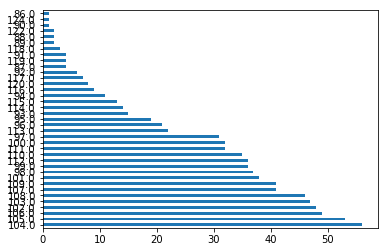

In [33]:
df_ignore[df_ignore['Full-flowering date (DOY)'] != np.nan]['Full-flowering date (DOY)'].value_counts().plot(kind='barh')

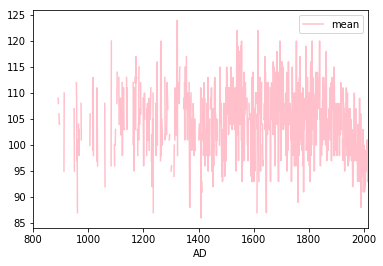

In [34]:
data = df_ignore.groupby('AD')['Full-flowering date (DOY)'].agg({'min','max','mean'})
data.reset_index(inplace=True)

ax  = data.plot(x='AD', y='mean', c='pink')



## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [35]:
df.rolling(10, on='AD', min_periods=5).mean().tail(20)
# If this gives you an error you're using an old pandas version,
# so you can use df.set_index('AD').rolling(10, min_periods=5).mean().reset_index().tail()
# instead

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1195,1996,97,400,"Added by Aono and Kazui (2008), Int. J. Climat...",data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)
1196,1997,97,400,"Added by Aono and Kazui (2008), Int. J. Climat...",data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)
1197,1998,96,399,"Added by Aono and Kazui (2008), Int. J. Climat...",data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)
1198,1999,96,399,"Added by Aono and Kazui (2008), Int. J. Climat...",data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)
1199,2000,97,407,"Added by Aono and Kazui (2008), Int. J. Climat...",data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)
1200,2001,97,407,"Added by Aono and Kazui (2008), Int. J. Climat...",data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)
1201,2002,97,406,"Added by Aono and Kazui (2008), Int. J. Climat...",data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)
1202,2003,97,407,"Added by Aono and Kazui (2008), Int. J. Climat...",data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)
1203,2004,96,406,"Added by Aono and Kazui (2008), Int. J. Climat...",data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)
1204,2005,96,406,"Added by Aono and Kazui (2008), Int. J. Climat...",data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA)


Adjust the code above to compute **and graph** a 20-year rolling average for the entire dataset.

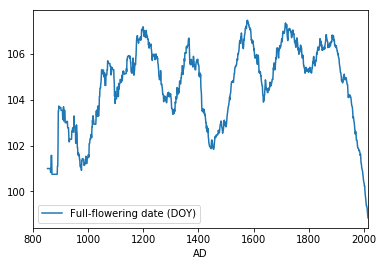

In [36]:
data = df_ignore.rolling(80, on='AD', min_periods=5).mean()

data.plot(kind='line', x = 'AD', y='Full-flowering date (DOY)')
# (x='AD',y='Full-flowering date (DOY)')





# Adding a month column

### HOLD ON, time to learn something

**There are a few ways to do the next question**, but a couple popular methods will have pandas yell at you. You might want to try this new thing called `loc`! **It is used to update a column in a row based on a condition.**

```
df.loc[df.country == 'Angola', "continent"] = "Africa"
```

This updates the `continent` column to be `Africa` for every row where `df.country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

### Actually adding our column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

In [37]:
import re

In [38]:
df_ignore.dtypes

AD                             int64
Full-flowering date (DOY)    float64
Full-flowering date          float64
Source code                   object
Data type code                object
Reference Name                object
dtype: object

In [39]:
df_ignore['Full-flowering date'] = df_ignore['Full-flowering date'].astype(str)


In [140]:
df_ignore.loc[df_ignore['Full-flowering date'].str.contains('^4.*$'), "month"] = "April "

In [141]:
df_ignore.loc[df_ignore['Full-flowering date'].str.contains('^3.*$'), "month"] = "March "

In [142]:
df_ignore.loc[df_ignore['Full-flowering date'].str.contains('^2.*$'), "month"] = "February "

### Using your new column, how many blossomings happened in each month?

In [43]:
df_ignore['month'].value_counts(dropna=True)

April    814
March     10
Name: month, dtype: int64

### Graph how many blossomings happened in each month.

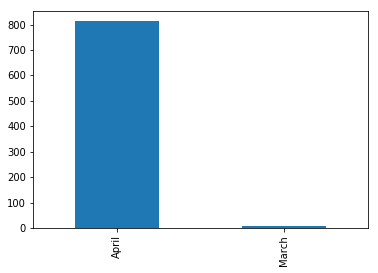

In [44]:
df_ignore['month'].value_counts(dropna=True).plot(kind='bar')

## 19. Adding a day-of-month column

Now we're going to add a new column called **day-of-month** based on the full-flowering date.

- 402 means "April 2"
- 312 means "March 12"
- 511 means "May 11"

**We're only interested in the second part**. Previously I've had students convert them to integers to do this, but you know regular expressions!

- Tip: You won't be able to extract anything from a float, you'll need it to be a string
- Tip: There are two things that mean "talk about this column as a string," maybe you want me to talk about them?

In [45]:
import re

In [54]:
df_ignore.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,month
1210,2011,99,409.0,Found after the last publication of articles.,data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA),April
1211,2012,101,410.0,Found after the last publication of articles.,data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA),April
1212,2013,93,403.0,Found after the last publication of articles.,data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA),April
1213,2014,94,404.0,Found after the last publication of articles.,data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA),April
1214,2015,93,403.0,Found after the last publication of articles.,data from modern times (full-bloom date since ...,NEWS-PAPER(ARASHIYAMA),April


In [145]:
[re.search(r'.(\d\d)', date).group(1) for date in df_ignore['Full-flowering date'] if re.search(r'.(\d\d)', date)]

['01',
 '15',
 '06',
 '18',
 '14',
 '09',
 '16',
 '05',
 '14',
 '19',
 '17',
 '16',
 '14',
 '13',
 '12',
 '07',
 '04',
 '20',
 '05',
 '14',
 '08',
 '07',
 '16',
 '19',
 '17',
 '05',
 '30',
 '22',
 '19',
 '07',
 '10',
 '28',
 '04',
 '14',
 '08',
 '13',
 '08',
 '16',
 '18',
 '11',
 '22',
 '14',
 '04',
 '10',
 '14',
 '15',
 '26',
 '10',
 '16',
 '25',
 '20',
 '09',
 '23',
 '08',
 '26',
 '07',
 '20',
 '12',
 '06',
 '13',
 '13',
 '13',
 '21',
 '15',
 '17',
 '02',
 '15',
 '23',
 '13',
 '11',
 '06',
 '29',
 '13',
 '15',
 '15',
 '10',
 '05',
 '10',
 '13',
 '14',
 '17',
 '24',
 '15',
 '23',
 '13',
 '10',
 '19',
 '12',
 '13',
 '22',
 '07',
 '21',
 '18',
 '17',
 '20',
 '16',
 '13',
 '13',
 '16',
 '23',
 '12',
 '21',
 '20',
 '17',
 '19',
 '06',
 '30',
 '13',
 '22',
 '22',
 '09',
 '16',
 '05',
 '21',
 '22',
 '23',
 '12',
 '27',
 '22',
 '23',
 '22',
 '13',
 '07',
 '14',
 '11',
 '24',
 '25',
 '14',
 '16',
 '22',
 '16',
 '29',
 '19',
 '13',
 '06',
 '16',
 '15',
 '19',
 '15',
 '14',
 '22',
 '07',
 '17',

Now that you've successfully extracted the last two letters, save them into a new column called `'day-of-month'`

### 20. Adding a date column

Now take the `'month'` and `'day-of-month'` columns and combine them in order to create a new column called `'date'`. If should look like "April 09".

In [ ]:
df_ignore['day-of-month']= df_ignore['Full-flowering date'].str.extract(r'.(\d\d)')

In [ ]:
df_ignore['date'] = df['month'] + df_ignore['day-of-month']